In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Reshape, Flatten, Conv2D, Conv2DTranspose
from tensorflow.keras.layers import LeakyReLU, ReLU, Dropout, Embedding, Concatenate, BatchNormalization
from numpy import zeros, ones
from numpy.random import randn, randint
from matplotlib import pyplot as plt


In [2]:
#pip install tensorflow

In [2]:
import os
import cv2
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from matplotlib.image import imread

In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, Conv2DTranspose, MaxPool2D
from tensorflow.keras.layers import ReLU, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.initializers import RandomNormal
from tensorflow.keras.layers import Input, Activation, Concatenate, BatchNormalization
from numpy import zeros, ones
from numpy.random import randint


In [4]:
################################################################################################################################

In [5]:

target_folder_path = r"C:\Users\shrir\OneDrive\Desktop\GAN\GAN_PS\DATASET\OLD_20\outputs"


In [6]:

target_elements = os.listdir(target_folder_path)

In [7]:
disc_temp_path = r"C:\Users\shrir\OneDrive\Desktop\GAN\GAN_PS\DATASET\mat_ccgan\disc_disp_mat"
disc_disp_path = r"C:\Users\shrir\OneDrive\Desktop\GAN\GAN_PS\DATASET\mat_ccgan\disc_disp_mat"
gen_temp_path = r"C:\Users\shrir\OneDrive\Desktop\GAN\GAN_PS\DATASET\mat_ccgan\gen_temp_mat"
gen_disp_path = r"C:\Users\shrir\OneDrive\Desktop\GAN\GAN_PS\DATASET\mat_ccgan\gen_disp_mat"

In [8]:
# DEVELOPING X_train MATRIX

def get_images(tmp_elements,disp_elements,y_elements,size,id):
  X= np.zeros((size,id,id,2))
  
  for index, (tmp_element, dsp_element) in enumerate(zip(tmp_elements, disp_elements)):
      # Load images for each channel
      tmp_element_path = os.path.join(disc_temp_path,str(id))
      tmp_element_path = os.path.join(tmp_element_path,tmp_elements[index])
      dsp_element_path = os.path.join(disc_disp_path,str(id))
      dsp_element_path = os.path.join(dsp_element_path,disp_elements[index])
      #print(tmp_elements[index]) 
    
      img_tmp = imread(tmp_element_path)
      img_dsp = imread(dsp_element_path)

      # Reshape images for each channel
      
      img_tmp = img_tmp.reshape((id,id, 1))
      img_dsp = img_dsp.reshape((id,id, 1))
      #print(img_tmp)
      img_tmp=img_tmp/127.5-1
    
      img_dsp=img_dsp/127.5-1
      # Combine channels
      #print(img_tmp.shape)
      img_combined = (np.concatenate((img_tmp, img_dsp), axis=2))
    
      print(img_combined.min,img_combined.max)   
      #print(img_combined)
      # Assign to X_train
      X[index] = img_combined
  return X


def get_Y(y_elements,size=20):
  Y= np.zeros((size,256,256,1))
  # DEVELOPING Y_train MATRIX
  for index,Y_train_element in enumerate(y_elements):
      element_path = os.path.join(target_folder_path,target_elements[index])
      #print(element_path)
      img = imread(element_path)
      img = np.mean(img, axis=2)
      img = img/255
        
      img = img.reshape((256, 256, 1))
      Y[index] = img
  return Y

In [9]:
img = cv2.imread(r"C:\Users\shrir\OneDrive\Desktop\GAN\GAN_PS\DATASET\OLD_20\outputs\CIR_VANE_Shape_75.jpeg")

print(img)

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


In [10]:
import os

temp_256 = sorted(os.listdir(os.path.join(disc_temp_path, '256')))
disp_256 = sorted(os.listdir(os.path.join(disc_temp_path, '256')))



disc_temp_128 = sorted(os.listdir(os.path.join(disc_temp_path, '128')))
disc_temp_64 = sorted(os.listdir(os.path.join(disc_temp_path, '64')))
disc_temp_32 = sorted(os.listdir(os.path.join(disc_temp_path, '32')))
disc_temp_16 = sorted(os.listdir(os.path.join(disc_temp_path, '16')))

gen_temp_64 = sorted(os.listdir(os.path.join(gen_temp_path, '64')))
gen_temp_16 = sorted(os.listdir(os.path.join(gen_temp_path, '16')))

disc_disp_128 = sorted(os.listdir(os.path.join(disc_disp_path, '128')))
disc_disp_64 = sorted(os.listdir(os.path.join(disc_disp_path, '64')))
disc_disp_32 = sorted(os.listdir(os.path.join(disc_disp_path, '32')))
disc_disp_16 = sorted(os.listdir(os.path.join(disc_disp_path, '16')))

gen_disp_64 = sorted(os.listdir(os.path.join(gen_disp_path, '64')))
gen_disp_16 = sorted(os.listdir(os.path.join(gen_disp_path, '16')))


tmp_array = [disc_temp_128,disc_temp_64,disc_temp_32,disc_temp_16,temp_256]
disp_array = [disc_disp_128,disc_disp_64,disc_disp_32,disc_disp_16,disp_256]

In [11]:
tmp_array[4]

['cc_256_disp_cv_1012_in.png',
 'cc_256_disp_cv_1094_in.png',
 'cc_256_disp_cv_1138_in.png',
 'cc_256_disp_cv_1143_in.png',
 'cc_256_disp_cv_1198_in.png',
 'cc_256_disp_cv_273_in.png',
 'cc_256_disp_cv_453_in.png',
 'cc_256_disp_cv_466_in.png',
 'cc_256_disp_cv_487_in.png',
 'cc_256_disp_cv_522_in.png',
 'cc_256_disp_cv_579_in.png',
 'cc_256_disp_cv_595_in.png',
 'cc_256_disp_cv_605_in.png',
 'cc_256_disp_cv_691_in.png',
 'cc_256_disp_cv_720_in.png',
 'cc_256_disp_cv_75_in.png',
 'cc_256_disp_cv_790_in.png',
 'cc_256_disp_cv_842_in.png',
 'cc_256_disp_cv_870_in.png',
 'cc_256_disp_cv_889_in.png']

In [12]:
target_elements[0]

'CIR_VANE_Shape_1012.jpeg'

In [13]:
temp = [342.4,343.8,342.9,341,340.6,345.4,340.5,340.3,337.8,339.4,337.2,345,343.5,339.2,340.5,337.5,340.4,342.8,338.9,341]
disp = [0.4031,0.4140,0.4002,0.3952,0.3912,0.4088,0.3963,0.3956,0.3933,0.3902,0.3886,0.4059,0.4052,0.3996,0.3936,0.3962,0.4052,0.4073,0.3993,0.4006]

In [14]:
for i in range(20): 
    temp[i] = tf.convert_to_tensor(temp[i])
    temp[i]=tf.expand_dims(temp[i], axis=0)
    temp[i]=tf.broadcast_to(temp[i], (1, 1))
    
    disp[i] = tf.convert_to_tensor(disp[i])
    disp[i]=tf.expand_dims(disp[i], axis=0)
    disp[i]=tf.broadcast_to(disp[i], (1, 1))

In [15]:
main_arr = []

#disc
X1=get_images(tmp_array[0],disp_array[0],target_elements,20,128)
X2=get_images(tmp_array[1],disp_array[1],target_elements,20,64)
X3=get_images(tmp_array[2],disp_array[2],target_elements,20,32)
X4=get_images(tmp_array[3],disp_array[3],target_elements,20,16)


inp_256 = get_images(tmp_array[4],disp_array[4],target_elements,20,256)


temp = np.array(temp)
disp = np.array(disp)

#gen - use X2 and X4

Y = get_Y(target_elements)

<built-in method min of numpy.ndarray object at 0x0000020587512390> <built-in method max of numpy.ndarray object at 0x0000020587512390>
<built-in method min of numpy.ndarray object at 0x0000020587512690> <built-in method max of numpy.ndarray object at 0x0000020587512690>
<built-in method min of numpy.ndarray object at 0x0000020587512810> <built-in method max of numpy.ndarray object at 0x0000020587512810>
<built-in method min of numpy.ndarray object at 0x0000020587512990> <built-in method max of numpy.ndarray object at 0x0000020587512990>
<built-in method min of numpy.ndarray object at 0x00000205875123F0> <built-in method max of numpy.ndarray object at 0x00000205875123F0>
<built-in method min of numpy.ndarray object at 0x0000020587512870> <built-in method max of numpy.ndarray object at 0x0000020587512870>
<built-in method min of numpy.ndarray object at 0x00000205875129F0> <built-in method max of numpy.ndarray object at 0x00000205875129F0>
<built-in method min of numpy.ndarray object at 

In [16]:
X1.shape

(20, 128, 128, 2)

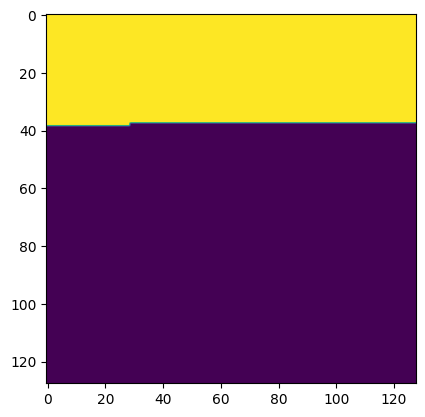

In [17]:
plt.imshow(X1[17][:,:,0])

In [18]:
Y.min()


0.0

In [19]:
tmp_array[4]

['cc_256_disp_cv_1012_in.png',
 'cc_256_disp_cv_1094_in.png',
 'cc_256_disp_cv_1138_in.png',
 'cc_256_disp_cv_1143_in.png',
 'cc_256_disp_cv_1198_in.png',
 'cc_256_disp_cv_273_in.png',
 'cc_256_disp_cv_453_in.png',
 'cc_256_disp_cv_466_in.png',
 'cc_256_disp_cv_487_in.png',
 'cc_256_disp_cv_522_in.png',
 'cc_256_disp_cv_579_in.png',
 'cc_256_disp_cv_595_in.png',
 'cc_256_disp_cv_605_in.png',
 'cc_256_disp_cv_691_in.png',
 'cc_256_disp_cv_720_in.png',
 'cc_256_disp_cv_75_in.png',
 'cc_256_disp_cv_790_in.png',
 'cc_256_disp_cv_842_in.png',
 'cc_256_disp_cv_870_in.png',
 'cc_256_disp_cv_889_in.png']

In [20]:
batch_size = 1
train_data=tf.data.Dataset.from_tensor_slices((inp_256,X1,X2,X3,X4,temp,disp,Y))
train_data=train_data.shuffle(10000).batch(batch_size)

In [21]:
train_data

<BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 2), dtype=tf.float64, name=None), TensorSpec(shape=(None, 128, 128, 2), dtype=tf.float64, name=None), TensorSpec(shape=(None, 64, 64, 2), dtype=tf.float64, name=None), TensorSpec(shape=(None, 32, 32, 2), dtype=tf.float64, name=None), TensorSpec(shape=(None, 16, 16, 2), dtype=tf.float64, name=None), TensorSpec(shape=(None, 1, 1), dtype=tf.float64, name=None), TensorSpec(shape=(None, 1, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None, 256, 256, 1), dtype=tf.float64, name=None))>

In [22]:
Y.shape


(20, 256, 256, 1)

In [23]:
disc_temp_128

['cc_128_disp_cv_1012_in.png',
 'cc_128_disp_cv_1094_in.png',
 'cc_128_disp_cv_1138_in.png',
 'cc_128_disp_cv_1143_in.png',
 'cc_128_disp_cv_1198_in.png',
 'cc_128_disp_cv_273_in.png',
 'cc_128_disp_cv_453_in.png',
 'cc_128_disp_cv_466_in.png',
 'cc_128_disp_cv_487_in.png',
 'cc_128_disp_cv_522_in.png',
 'cc_128_disp_cv_579_in.png',
 'cc_128_disp_cv_595_in.png',
 'cc_128_disp_cv_605_in.png',
 'cc_128_disp_cv_691_in.png',
 'cc_128_disp_cv_720_in.png',
 'cc_128_disp_cv_75_in.png',
 'cc_128_disp_cv_790_in.png',
 'cc_128_disp_cv_842_in.png',
 'cc_128_disp_cv_870_in.png',
 'cc_128_disp_cv_889_in.png']

In [24]:
gen_temp_64

['cc_64_temp_cv_1012_in.png',
 'cc_64_temp_cv_1094_in.png',
 'cc_64_temp_cv_1138_in.png',
 'cc_64_temp_cv_1143_in.png',
 'cc_64_temp_cv_1198_in.png',
 'cc_64_temp_cv_273_in.png',
 'cc_64_temp_cv_453_in.png',
 'cc_64_temp_cv_466_in.png',
 'cc_64_temp_cv_487_in.png',
 'cc_64_temp_cv_522_in.png',
 'cc_64_temp_cv_579_in.png',
 'cc_64_temp_cv_595_in.png',
 'cc_64_temp_cv_605_in.png',
 'cc_64_temp_cv_691_in.png',
 'cc_64_temp_cv_720_in.png',
 'cc_64_temp_cv_75_in.png',
 'cc_64_temp_cv_790_in.png',
 'cc_64_temp_cv_842_in.png',
 'cc_64_temp_cv_870_in.png',
 'cc_64_temp_cv_889_in.png']

In [25]:
################################################################################################################################

In [26]:
i=0
for elm in disc_temp_128:
    i=i+1    
print(i)

20


In [27]:
i=0
for elm in disc_temp_64:
    i=i+1    
print(i)

20


In [28]:
j=0
for elm in target_elements:
    j=j+1    
print(j)

20


In [29]:
################################################################################################################################

In [30]:
################################################################################################################################

In [31]:
################################################################################################################################

In [32]:
################################################################################################################################

In [33]:
def summarize_performance(step, g_model, n_samples=3):
    # select a sample of input images
    [X_realA, X_realB], _ = generate_real_samples(n_samples, 1)
    
    # generate a batch of fake samples
    X_fakeB, _ = generate_fake_samples(g_model, X_realA, 1)
    
    # plot real source images
    for i in range(n_samples):
        plt.subplot(3, n_samples, 1 + i)
        plt.axis('off')
        plt.imshow(X_realA[i])
    # plot generated target image
    for i in range(n_samples):
        plt.subplot(3, n_samples, 1 + n_samples + i)
        plt.axis('off')
        plt.imshow(X_fakeB[i])
    # plot real target image
    for i in range(n_samples):
        plt.subplot(3, n_samples, 1 + n_samples*2 + i)
        plt.axis('off')
        plt.imshow(X_realB[i])
    # save plot to file
    filename1 = 'plot_%06d.png' % (step+1)
    plt.savefig(filename1)
    plt.close()
    # save the generator model
    filename2 = 'model_%06d.h5' % (step+1)
    g_model.save(filename2)
    print('>Saved: %s and %s' % (filename1, filename2))

In [34]:
import tensorflow as tf
def generate_noise(latent_dim):
    noise = tf.random.normal([1,latent_dim])
    return noise


In [35]:
generate_noise(100).shape

TensorShape([1, 100])

In [36]:


def define_discriminator(in_shape=(256,256,1)):  

    condition = Input(shape=(256,256,2))  
    in_image = Input(shape=in_shape)   #
    
    x1 = Input(shape=(128,128,2))

    
    x2 = Input(shape=(64,64,2))

    
    x3 = Input(shape=(32,32,2))
   
    
    x4 = Input(shape=(16,16,2))
   
    
    merge = Concatenate()([condition,in_image])
     

    

    disc = Conv2D(64, (4,4), strides=(2,2), padding='same')(merge)
    disc = Concatenate()([disc,x1 ])
    disc = BatchNormalization()(disc)
    disc = LeakyReLU(alpha=0.2)(disc)
    disc = Dropout(0.2)(disc)
    
    disc = Conv2D(128, (4,4), strides=(2,2), padding='same')(disc)
    disc = Concatenate()([disc,x2 ]) 
    disc = BatchNormalization()(disc)
    disc = LeakyReLU(alpha=0.2)(disc)
    disc = Dropout(0.2)(disc)
    
    disc = Conv2D(256, (4,4), strides=(2,2), padding='same')(disc)
    disc = Concatenate()([disc,x3 ]) 
    disc = BatchNormalization()(disc)
    disc = LeakyReLU(alpha=0.2)(disc)
    disc = Dropout(0.2)(disc)
    
    disc = Conv2D(512, (4,4), strides=(2,2), padding='same')(disc)
    disc = Concatenate()([disc,x4 ]) 
    disc = BatchNormalization()(disc)
    disc = LeakyReLU(alpha=0.2)(disc)
    disc = Dropout(0.2)(disc)

    
    

    
    layer = Flatten()(disc)
   

    out_layer = Dense(1)(layer)  

    model = Model([in_image, condition,x1,x2,x3,x4], out_layer)
    model.summary()
   
    return model


In [37]:
discriminator = define_discriminator()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 2  0           []                               
                                )]                                                                
                                                                                                  
 input_2 (InputLayer)           [(None, 256, 256, 1  0           []                               
                                )]                                                                
                                                                                                  
 concatenate (Concatenate)      (None, 256, 256, 3)  0           ['input_1[0][0]',                
                                                                  'input_2[0][0]']            

In [38]:
def define_generator(latent_dim=100,nodes=4096):

    g1 = Input(shape=(16,16,2))
    
    
    g2 = Input(shape=(64,64,2))
   
    
    in_label_1 = Input(shape=(1,))  
    in_label_2 = Input(shape=(1,))
    
    latent =  Input(shape=(latent_dim,))
    merge = Concatenate()([latent, in_label_1,in_label_2]) 
    
    merge = Dense(nodes)(merge)
    gen = Reshape((4, 4, 256))(merge) 
    
    
    
    gen = Conv2DTranspose(128, (4,4), strides=(4,4), padding='same')(gen)  
    merge1 = Concatenate()([gen, g1]) 
    gen = BatchNormalization()(merge1)
    gen = ReLU()(gen)
    
    
    gen = Conv2DTranspose(64, (4,4), strides=(4,4), padding='same')(gen) 
    merge2 = Concatenate()([gen, g2]) 
    gen = BatchNormalization()(merge2)
    gen = ReLU()(gen)

    
    gen_out = Conv2DTranspose(1, (4,4), strides=(4,4), padding='same',activation='tanh')(gen) 
    
    
  
    
    model = Model([latent, in_label_1,in_label_2,g1,g2], gen_out)
    
    model.summary()
    return model   


In [39]:
generator = define_generator()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_11 (InputLayer)          [(None, 100)]        0           []                               
                                                                                                  
 input_9 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 input_10 (InputLayer)          [(None, 1)]          0           []                               
                                                                                                  
 concatenate_5 (Concatenate)    (None, 102)          0           ['input_11[0][0]',               
                                                                  'input_9[0][0]',          

In [40]:
'''
def gen_train(tr_size=20,latent_dim=100,nodes=4096):  
    
    for i in range(tr_size):    
        temp1= cv2.imread(gen_temp_64[i])
        disp1 = cv2.imread(gen_disp_64[i])
        temp2= cv2.imread(gen_temp_16[i])
        disp2 = cv2.imread(gen_disp_16[i])

        temp_1 = tf.expand_dims(temp1, axis=0)
        disp_1 = tf.expand_dims(disp1,axis=0)
        temp_2 = tf.expand_dims(temp2, axis=0)
        disp_2 = tf.expand_dims(disp2,axis=0)

        latent = generate_noise(100)

        generator_model = define_generator(latent_dim=latent_dim, nodes=nodes)


        gen_output = generator_model([latent, temp_1, disp_1, temp_2, disp_2])
'''

'\ndef gen_train(tr_size=20,latent_dim=100,nodes=4096):  \n    \n    for i in range(tr_size):    \n        temp1= cv2.imread(gen_temp_64[i])\n        disp1 = cv2.imread(gen_disp_64[i])\n        temp2= cv2.imread(gen_temp_16[i])\n        disp2 = cv2.imread(gen_disp_16[i])\n\n        temp_1 = tf.expand_dims(temp1, axis=0)\n        disp_1 = tf.expand_dims(disp1,axis=0)\n        temp_2 = tf.expand_dims(temp2, axis=0)\n        disp_2 = tf.expand_dims(disp2,axis=0)\n\n        latent = generate_noise(100)\n\n        generator_model = define_generator(latent_dim=latent_dim, nodes=nodes)\n\n\n        gen_output = generator_model([latent, temp_1, disp_1, temp_2, disp_2])\n'

In [41]:
'''
def disc_train(tr_size=20,temp,disp,in_shape=(256,256,1)):
    
    for i in range(tr_size):
        in_image = 
        
        condition = source[i]
        
        temp1= cv2.imread(disc_temp_128[i])
        disp1 = cv2.imread(disc_disp_128[i])
        temp2= cv2.imread(disc_temp_64[i])
        disp2 = cv2.imread(disc_disp_64[i])
        temp3= cv2.imread(disc_temp_32[i])
        disp3 = cv2.imread(disc_disp_32[i])
        temp4= cv2.imread(disc_temp_16[i])
        disp4 = cv2.imread(disc_disp_16[i])
        
        temp_1 = tf.expand_dims(temp1, axis=0)
        disp_1 = tf.expand_dims(disp1,axis=0)
        temp_2 = tf.expand_dims(temp2, axis=0)
        disp_2 = tf.expand_dims(disp2,axis=0)
        temp_3 = tf.expand_dims(temp3, axis=0)
        disp_3 = tf.expand_dims(disp3,axis=0)
        temp_4 = tf.expand_dims(temp4, axis=0)
        disp_4 = tf.expand_dims(disp4,axis=0)
    

      
        
        disc_model = define_discriminator(in_shape)
        

        disc_output = disc_model([in_image,condition, temp_1, disp_1, temp_2, disp_2,temp_3,disp_3,temp_4,disp_4])
        
      '''  
    

'\ndef disc_train(tr_size=20,temp,disp,in_shape=(256,256,1)):\n    \n    for i in range(tr_size):\n        in_image = \n        \n        condition = source[i]\n        \n        temp1= cv2.imread(disc_temp_128[i])\n        disp1 = cv2.imread(disc_disp_128[i])\n        temp2= cv2.imread(disc_temp_64[i])\n        disp2 = cv2.imread(disc_disp_64[i])\n        temp3= cv2.imread(disc_temp_32[i])\n        disp3 = cv2.imread(disc_disp_32[i])\n        temp4= cv2.imread(disc_temp_16[i])\n        disp4 = cv2.imread(disc_disp_16[i])\n        \n        temp_1 = tf.expand_dims(temp1, axis=0)\n        disp_1 = tf.expand_dims(disp1,axis=0)\n        temp_2 = tf.expand_dims(temp2, axis=0)\n        disp_2 = tf.expand_dims(disp2,axis=0)\n        temp_3 = tf.expand_dims(temp3, axis=0)\n        disp_3 = tf.expand_dims(disp3,axis=0)\n        temp_4 = tf.expand_dims(temp4, axis=0)\n        disp_4 = tf.expand_dims(disp4,axis=0)\n    \n\n      \n        \n        disc_model = define_discriminator(in_shape)\n  

In [42]:
import keras
loss=keras.losses.BinaryCrossentropy(from_logits=True)

def disc_loss(real_output,fake_output):
  real_loss=loss(tf.ones_like(real_output),real_output)
  fake_loss=loss(tf.zeros_like(fake_output),fake_output)
  return real_loss+fake_loss


def gen_loss(generated_output):
  
  
  gan_loss = loss(tf.ones_like(generated_output), generated_output)
  gan_loss = tf.cast(gan_loss,tf.float64)

  return gan_loss

In [46]:
gen_opt=tf.keras.optimizers.Adam(learning_rate=0.0002,beta_1=0.5,beta_2=0.999)
disc_opt=tf.keras.optimizers.Adam(learning_rate=0.0002,beta_1=0.5,beta_2=0.999)

In [47]:
import tensorflow as tf
def generate_noise(latent_dim=100):
    noise = tf.random.normal([1,latent_dim])
    return noise


In [48]:

def compare_images(latent, t,d,g1,g2,target,epoch):
  generated = generator([latent, t,d,g1,g2], training=True)
  plt.figure(figsize=(15,5))
  
  images_list = [target[0], generated[0]]
  
  title = ['Real (ground truth)', 'Generated Image (fake)']

  for i in range(2):
    plt.subplot(1, 2, i + 1)
    plt.title(title[i])
    images_list[i]=images_list[i]/2
    images_list[i]+=0.5
    plt.imshow(images_list[i],cmap='gray')

    plt.axis('off')
  plt.suptitle(f'Step {epoch}')
  plt.show()

In [49]:
@tf.function
def train_step(inp_256, t,d,x1,x2,x3,x4,real):
  with tf.GradientTape() as g_tape, tf.GradientTape() as d_tape:
    latent =  generate_noise()
    g_output = generator([latent, t,d,x4,x2],training=True)
    
    d_output_real = discriminator([real,inp_256 ,x1,x2,x3,x4],training=True)
    
    d_generated_output = discriminator([g_output,inp_256,x1, x2,x3,x4],training=True)
    
    g_loss_total =gen_loss(d_generated_output)
    
    d_loss = disc_loss(d_output_real, d_generated_output)
    
  gradients_generator = g_tape.gradient(g_loss_total, generator.trainable_variables)
  gradients_discriminator = d_tape.gradient(d_loss, discriminator.trainable_variables)
  gen_opt.apply_gradients(zip(gradients_generator, generator.trainable_variables))
  disc_opt.apply_gradients(zip(gradients_discriminator, discriminator.trainable_variables))

In [50]:
from IPython import display

def train(train_set, steps):
       
    
   
        inp_256, X1, X2, X3, X4, T, D, Y =  next(iter(train_set.take(1)))
        
        for step, (inp, x1, x2, x3, x4, t, d, y) in train_set.repeat().take(steps).enumerate():
            print('Step ', step)
            if step % 20 == 0:
                display.clear_output(wait=True)
                compare_images(generate_noise(), T, D, X4, X2, Y, step)
                print(f"step: {step}")
            train_step(inp, t, d, x1, x2, x3, x4, y)

In [51]:

'''
from IPython import display

def train(train_set, steps ):
    for epoch in range(steps//20):
        print(f"Epoch {epoch + 1}/{steps//20}:")
        train_iter = iter(train_set)
        
        for step in range(steps):
            try:
                inp_256, X1, X2, X3, X4, T, D, Y = next(train_iter)  
                print(T,D)
            except StopIteration:
                break  
            
            print('Step ', step)
            if step % 20 == 0:
                # display.clear_output(wait=True)
                compare_images(generate_noise(), T, D, X4, X2, Y, step)
                print(f"step: {step}")
            train_step(inp_256, T, D, X1, X2, X3, X4, Y)
            '''


'\nfrom IPython import display\n\ndef train(train_set, steps ):\n    for epoch in range(steps//20):\n        print(f"Epoch {epoch + 1}/{steps//20}:")\n        train_iter = iter(train_set)\n        \n        for step in range(steps):\n            try:\n                inp_256, X1, X2, X3, X4, T, D, Y = next(train_iter)  \n                print(T,D)\n            except StopIteration:\n                break  \n            \n            print(\'Step \', step)\n            if step % 20 == 0:\n                # display.clear_output(wait=True)\n                compare_images(generate_noise(), T, D, X4, X2, Y, step)\n                print(f"step: {step}")\n            train_step(inp_256, T, D, X1, X2, X3, X4, Y)\n            '

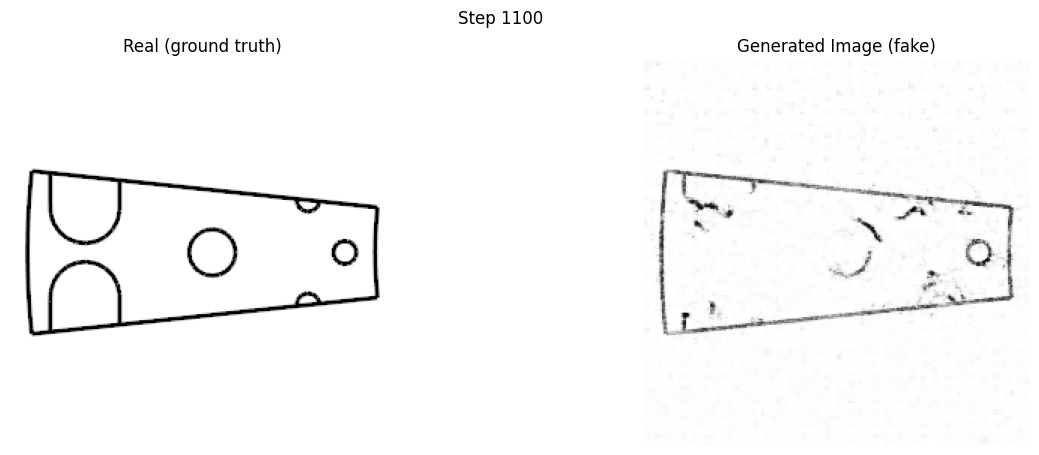

step: 1100
Step  tf.Tensor(1101, shape=(), dtype=int64)
Step  tf.Tensor(1102, shape=(), dtype=int64)
Step  tf.Tensor(1103, shape=(), dtype=int64)
Step  tf.Tensor(1104, shape=(), dtype=int64)
Step  tf.Tensor(1105, shape=(), dtype=int64)
Step  tf.Tensor(1106, shape=(), dtype=int64)
Step  tf.Tensor(1107, shape=(), dtype=int64)
Step  tf.Tensor(1108, shape=(), dtype=int64)
Step  tf.Tensor(1109, shape=(), dtype=int64)
Step  tf.Tensor(1110, shape=(), dtype=int64)
Step  tf.Tensor(1111, shape=(), dtype=int64)
Step  tf.Tensor(1112, shape=(), dtype=int64)
Step  tf.Tensor(1113, shape=(), dtype=int64)


KeyboardInterrupt: 

In [52]:
train(train_data,5000)

In [ ]:
plt.figure(figsize=(10,5))
iter_ = iter(train_data)
for i in range(30):
    inp_256,X1,X2,X3,X4,T,D,Y = next(iter_)
    print(D)
    plt.subplot(6,5,i+1)
    plt.axis("off")
    plt.imshow(Y[0],cmap='gray')
    

    
#pred = generator([generate_noise(),T,D,X4,X2],training=False)
#plt.imshow(pred[0],cmap='gray')


In [ ]:
plt.figure(figsize=(20,10))
train_iter = iter(train_data)
for i in range(30):  
    inp_256,X1,X2,X3,X4,T,D,Y = next(train_iter)
    plt.subplot(6,5,i+1)
    plt.axis("off")
    #plt.imshow(generator([generate_noise(),T,D,X4,X2],training=False)[0],cmap='gray')
    plt.imshow(Y[0],cmap='gray')
    
   
    
#pred = generator([generate_noise(),T,D,X4,X2],training=False)
#plt.imshow(pred[0],cmap='gray')


In [ ]:
train_data.as_numpy_iterator().next()

In [ ]:
train_iter = iter(train_data)
inp_256,X1,X2,X3,X4,T,D,Y = next(train_iter)
print(np.array(inp_256).min())